In [ ]:
# ===========================================
# ANÁLISE SALARIAL NA ÁREA DE DADOS
# Autor: Lucas Matos | Dashboards & Dados
# ===========================================

# 1. Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
plt.style.use('ggplot')
sns.set_palette('Blues')
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

# 2. Leitura do dataset
df = pd.read_csv('ds_salaries.csv')
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
# Verificar informações gerais
df.info()

# Verificar valores nulos
print(df.isnull().sum())

# Padronizar nomes das colunas
df.columns = df.columns.str.lower().str.strip()

# Verificar valores únicos em colunas categóricas
for col in df.select_dtypes('object').columns:
    print(f"\nColuna: {col}")
    print(df[col].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
sala

In [ ]:
# Traduzir níveis de experiência (se quiser)
map_exp = {'EN': 'Junior', 'MI': 'Pleno', 'SE': 'Sênior', 'EX': 'Diretor'}
df['experience_level'] = df['experience_level'].map(map_exp)

# Traduzir tamanho da empresa
map_size = {'S': 'Pequena', 'M': 'Média', 'L': 'Grande'}
df['company_size'] = df['company_size'].map(map_size)

# Verificar outliers de salário
df[['salary_in_usd']].describe()


,salary_in_usd
count,607.00
mean,"112,297.87"
std,"70,957.26"
min,"2,859.00"
25%,"62,726.00"
50%,"101,570.00"
75%,"150,000.00"
max,"600,000.00"


Média salarial (USD): 112,297.87
job_title
Data Analytics Lead        405,000.00
Principal Data Engineer    328,333.33
Financial Data Analyst     275,000.00
Principal Data Scientist   215,242.43
Director of Data Science   195,074.00
Name: salary_in_usd, dtype: float64


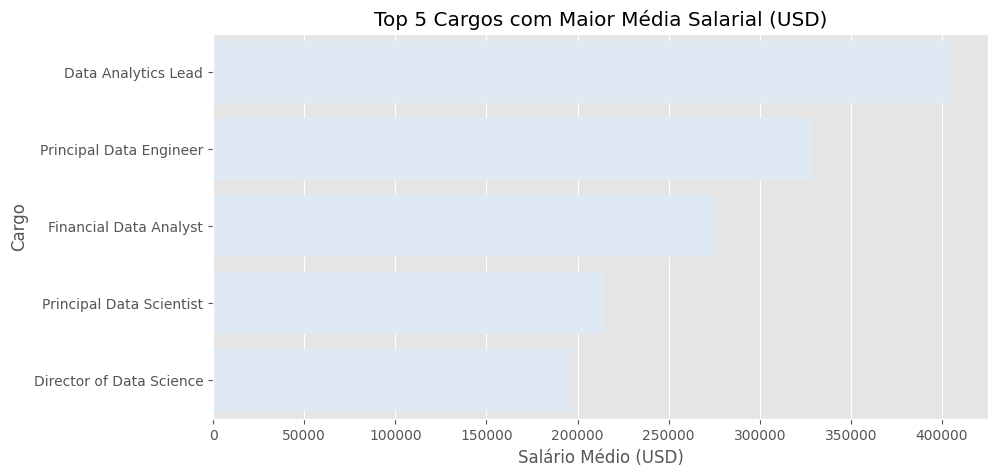

In [ ]:
# Média salarial geral
print(f"Média salarial (USD): {df['salary_in_usd'].mean():,.2f}")

# Top 5 cargos com maior média salarial
top_cargos = (
    df.groupby('job_title')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)
print(top_cargos)

# Gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(x=top_cargos.values, y=top_cargos.index)
plt.title('Top 5 Cargos com Maior Média Salarial (USD)')
plt.xlabel('Salário Médio (USD)')
plt.ylabel('Cargo')
plt.show()


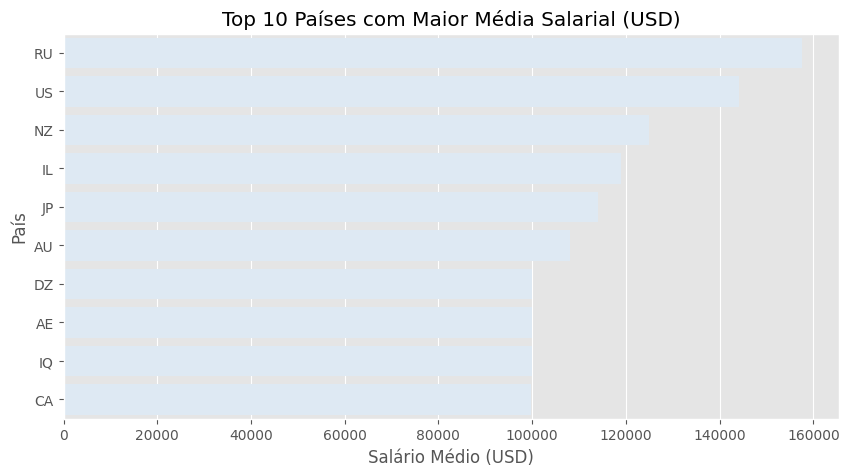

In [ ]:
top_paises = (
    df.groupby('company_location')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_paises.values, y=top_paises.index)
plt.title('Top 10 Países com Maior Média Salarial (USD)')
plt.xlabel('Salário Médio (USD)')
plt.ylabel('País')
plt.show()


In [ ]:
# Tradução dos níveis de experiência
map_exp = {
    'EN': 'Júnior',
    'MI': 'Pleno',
    'SE': 'Sênior',
    'EX': 'Diretor'
}

# Tradução do tipo de emprego
map_emp = {
    'FT': 'Tempo integral',
    'PT': 'Meio período',
    'CT': 'Contrato',
    'FL': 'Freelancer'
}

# Tradução do tamanho da empresa
map_size = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}


In [ ]:
# Renomear colunas pro português
df = df.rename(columns={
    'unnamed: 0': 'id',
    'work_year': 'ano_base',
    'experience_level': 'nível_experiência',
    'employment_type': 'tipo_emprego',
    'job_title': 'cargo',
    'salary': 'salário_original',
    'salary_currency': 'moeda_salário',
    'salary_in_usd': 'salário_usd',
    'employee_residence': 'país_residência',
    'remote_ratio': 'percentual_remoto',
    'company_location': 'país_empresa',
    'company_size': 'tamanho_empresa'
})

In [ ]:
print(df.columns)


Index(['id', 'ano', 'nível_experiência', 'tipo_emprego', 'cargo',
       'salário_original', 'moeda_salário', 'salário_usd', 'país_residência',
       'percentual_remoto', 'país_empresa', 'tamanho_empresa'],
      dtype='object')


In [ ]:
# Tradução parcial de cargos
df['cargo'] = df['cargo'].replace({
    'Data Scientist': 'Cientista de Dados',
    'Data Engineer': 'Engenheiro de Dados',
    'Data Analyst': 'Analista de Dados',
    'Machine Learning Engineer': 'Engenheiro de Machine Learning',
    'Analytics Engineer': 'Engenheiro de Analytics',
    'Business Intelligence Engineer': 'Engenheiro de BI'
})


In [ ]:
df.head()

,id,ano,nível_experiência,tipo_emprego,cargo,salário_original,moeda_salário,salário_usd,país_residência,percentual_remoto,país_empresa,tamanho_empresa
0,0,2020,NaN,Tempo integral,Cientista de Dados,70000,EUR,79833,DE,0,DE,NaN
1,1,2020,NaN,Tempo integral,Machine Learning Scientist,260000,USD,260000,JP,0,JP,NaN
2,2,2020,NaN,Tempo integral,Big Data Engineer,85000,GBP,109024,GB,50,GB,NaN
3,3,2020,NaN,Tempo integral,Product Data Analyst,20000,USD,20000,HN,0,HN,NaN
4,4,2020,NaN,Tempo integral,Engenheiro de Machine Learning,150000,USD,150000,US,50,US,NaN


In [ ]:


# Traduções seguras
map_exp = {
    'EN': 'Júnior',
    'MI': 'Pleno',
    'SE': 'Sênior',
    'EX': 'Diretor'
}

map_emp = {
    'FT': 'Tempo integral',
    'PT': 'Meio período',
    'CT': 'Contrato',
    'FL': 'Freelancer'
}

map_size = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}

# Aplica tradução com fallback
df['experience_level'] = df['experience_level'].replace(map_exp).fillna(df['experience_level'])
df['employment_type'] = df['employment_type'].replace(map_emp).fillna(df['employment_type'])
df['company_size'] = df['company_size'].replace(map_size).fillna(df['company_size'])

# Renomeia colunas
df = df.rename(columns={
    'work_year': 'ano',
    'experience_level': 'nível_experiência',
    'employment_type': 'tipo_emprego',
    'job_title': 'cargo',
    'salary': 'salário_original',
    'salary_currency': 'moeda_salário',
    'salary_in_usd': 'salário_usd',
    'employee_residence': 'país_residência',
    'remote_ratio': 'percentual_remoto',
    'company_location': 'país_empresa',
    'company_size': 'tamanho_empresa'
})

# Tradução parcial de cargos (segura)
df['cargo'] = df['cargo'].replace({
    'Data Scientist': 'Cientista de Dados',
    'Data Engineer': 'Engenheiro de Dados',
    'Data Analyst': 'Analista de Dados',
    'Machine Learning Engineer': 'Engenheiro de Machine Learning',
    'Analytics Engineer': 'Engenheiro de Analytics',
    'Business Intelligence Engineer': 'Engenheiro de BI'
}).fillna(df['cargo'])

# Salva novo arquivo
df.to_csv('ds_salaries_pt_corrigido.csv', index=False, encoding='utf-8-sig')
print("✅ Arquivo corrigido salvo com sucesso!")




✅ Arquivo corrigido salvo com sucesso!


In [ ]:
df.to_csv('ds_salaries_pt.csv', index=False, encoding='utf-8-sig')
print("✅ Arquivo traduzido salvo com sucesso como 'ds_salaries_pt.csv'")

✅ Arquivo traduzido salvo com sucesso como 'ds_salaries_pt.csv'
